In [6]:
# 评分方差
import numpy as np
import pandas as pd
import seaborn as sns

df_movie=pd.read_csv("data/movie_comments.csv",dtype={"score":np.float64,"content":str})
df_cele=pd.read_csv("data/cele_comments.csv",dtype={"score":str,"content":str})

group_id_movie=df_movie.groupby("work_id")
group_id_cele=df_cele.groupby("work_id")

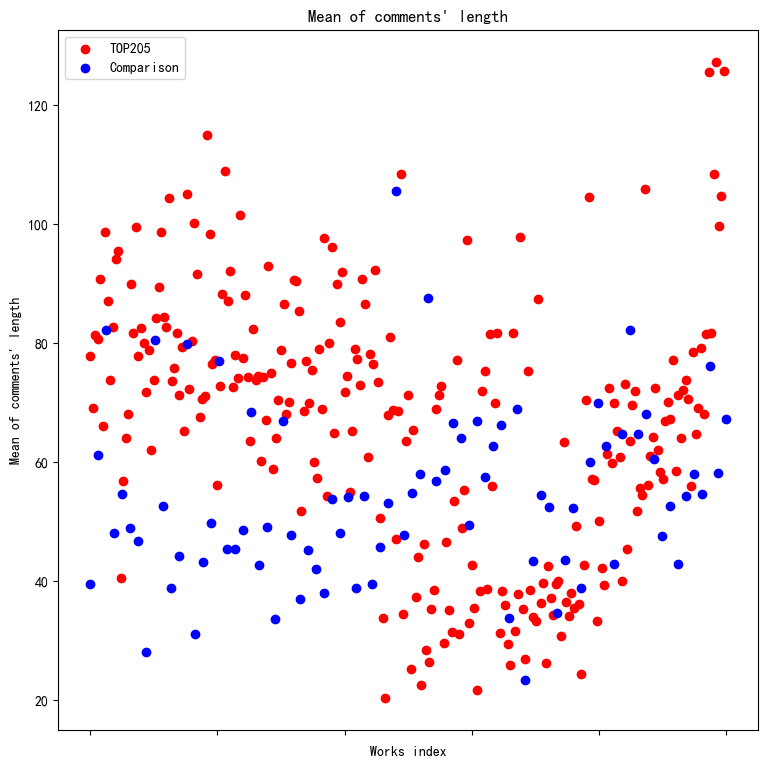

In [7]:
import matplotlib.pyplot as plt
mean_commentlen_movie=[
    np.mean(list(map(lambda x:len(str(x)),i[1]["content"]))) for i in group_id_movie
]	# top250每部电影短评的平均长度
mean_commentlen_cele=[
    np.mean(list(map(lambda x:len(str(x)),i[1]["content"]))) for i in group_id_cele
]	# 对照组每部作品短评的平均长度

fig=plt.figure(figsize=(7,7))

y=mean_commentlen_movie
x=range(len(y))
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y,color="r")

y=mean_commentlen_cele
x=np.linspace(0,250,80)
ax.scatter(x,y,color="b")

ax.set_title("Mean of comments' length")
ax.set_xlabel("Works index")
ax.set_ylabel("Mean of comments' length")
ax.set_xticklabels([])
ax.legend(["TOP250","Comparison"])

plt.show()

[22.084710707777738, 14.49854036431538]


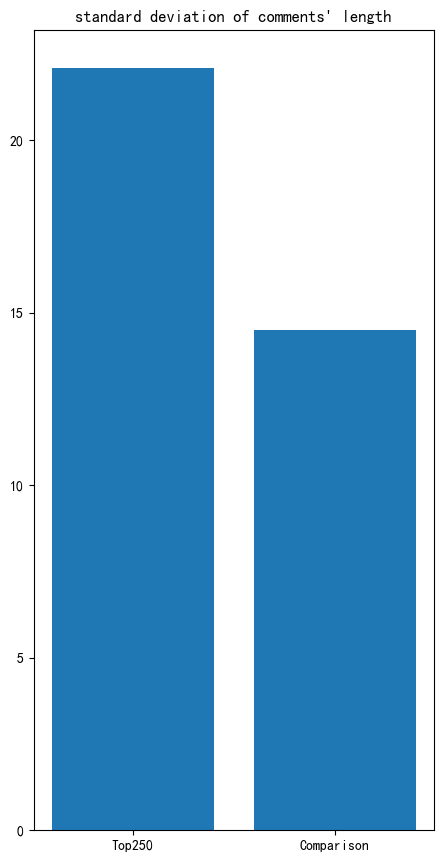

In [8]:
variance=[np.std(mean_commentlen_movie),np.std(mean_commentlen_cele)]
print(variance)

fig=plt.figure(figsize=(4,8))

ax=fig.add_axes([0,0,1,1])
ax.bar([0,1],variance)
ax.set_title("standard deviation of comments' length")
ax.set_xticks([0,1],["Top250","Comparison"])

plt.show()

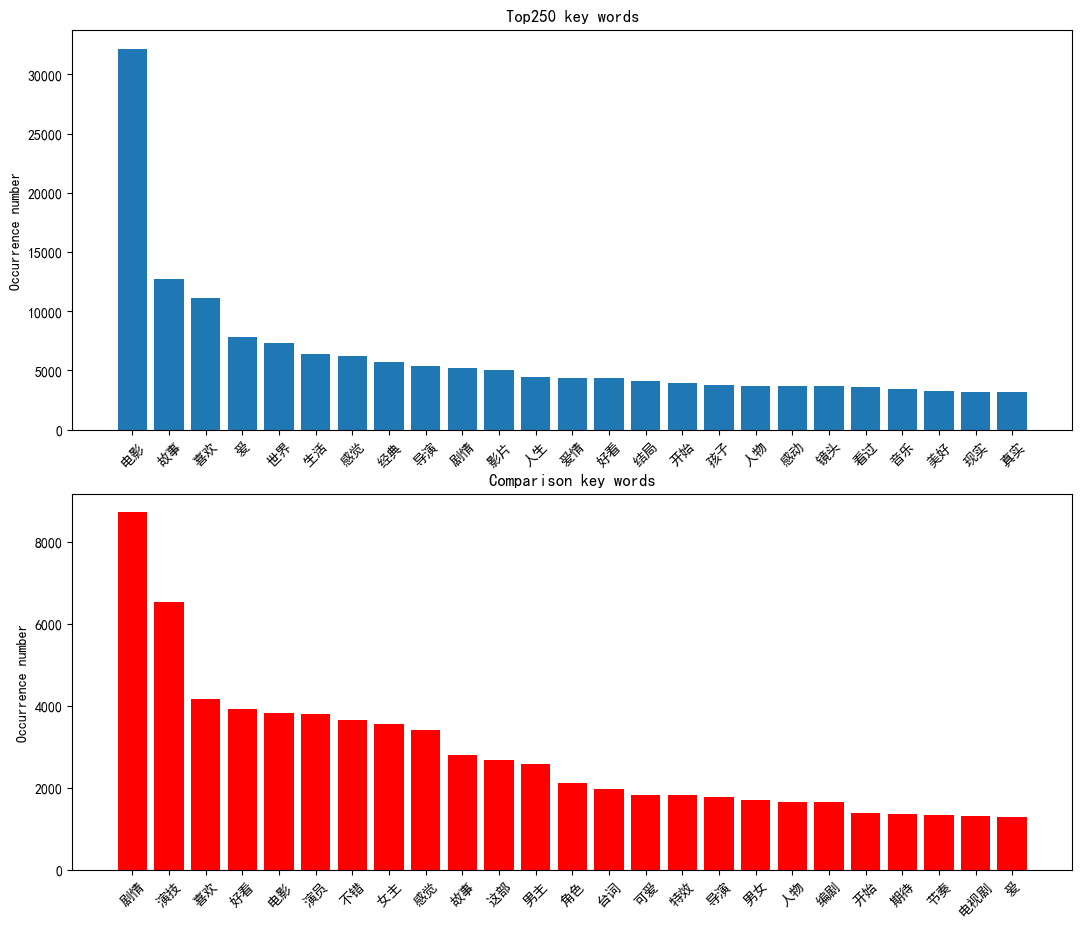

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


cele_word=pd.read_csv("data/cele_comments_wordscnt.csv")
movie_word=pd.read_csv("data/movie_comments_wordscnt.csv")

plt.rcParams['font.sans-serif']=['SimHei']
fig=plt.figure(figsize=(10,8))

x=movie_word["words"][:25]
y=movie_word["times"][:25]
ax=fig.add_axes([0,0.55,1,0.5])
ax.bar(x,y) 
ax.set_title("Top250 key words")
ax.set_ylabel("Occurrence number")
plt.xticks(rotation=45)

x=cele_word["words"][:25]
y=cele_word["times"][:25]
ax=fig.add_axes([0,0,1,0.47])
ax.bar(x,y,color='r')
ax.set_title("Comparison key words")
ax.set_ylabel("Occurrence number")
plt.xticks(rotation=45)

plt.show()

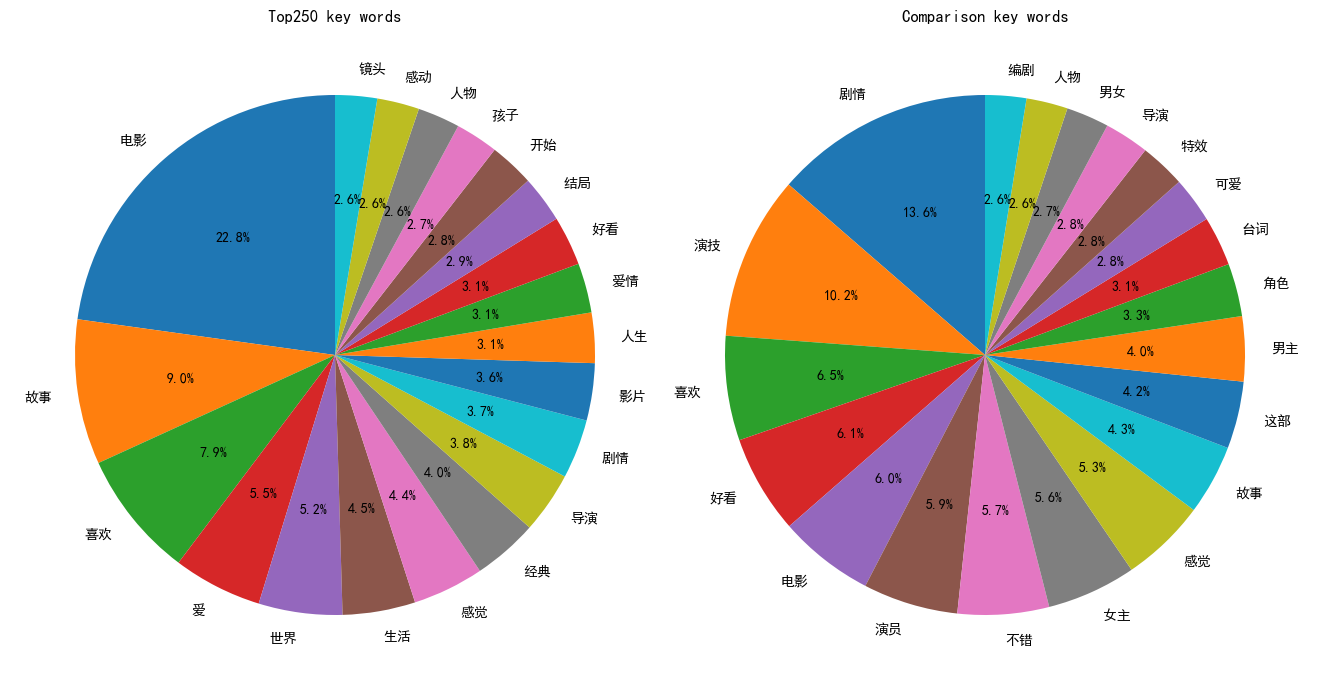

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

cele_word=pd.read_csv("data/cele_comments_wordscnt.csv")
movie_word=pd.read_csv("data/movie_comments_wordscnt.csv")

plt.rcParams['font.sans-serif']=['SimHei']
fig=plt.figure(figsize=(13,13))

x=movie_word["words"][:20]
y=movie_word["times"][:20]
ax=fig.add_axes([0,0,0.5,1])
ax.pie(list(map(lambda k:k/np.sum(y),y)),labels=x,autopct='%1.1f%%',startangle=90)
ax.set_title("Top250 key words")

x=cele_word["words"][:20]
y=cele_word["times"][:20]
ax=fig.add_axes([0.5,0,0.5,1])
ax.pie(list(map(lambda k:k/np.sum(y),y)),labels=x,autopct='%1.1f%%',startangle=90)
ax.set_title("Comparison key words")

plt.show()